<a href="https://colab.research.google.com/github/tomiambro/covid_transfer_learning/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
!pip install --upgrade git+https://github.com/fastai/fastai.git &> 2
!pip install pip install nbdev &> 2

In [2]:
from fastai.vision.all import *
from torchvision import transforms as T

In [3]:
dataset_path = 'gdrive/MyDrive/machine_learning/datasets/covid_dataset'  #change dir to your project folder
folder_path = 'gdrive/MyDrive/machine_learning/covid/'

In [4]:
from google.colab import drive

drive._mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


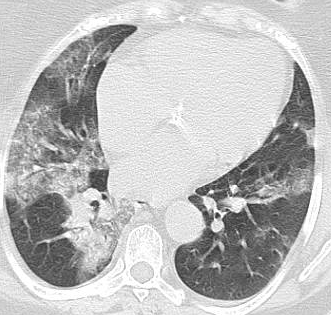

In [5]:
im = Image.open(f"{dataset_path}/COVID/Covid (1000).png")
im.to_thumb(350,350)

Create array with Path objects to imgs

In [6]:
path = Path(f"{dataset_path}")
fns = get_image_files(path)
fns

(#2481) [Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1227).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1229).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1226).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1209).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1238).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1233).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1205).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1220).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1216).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1223).png')...]

In [7]:
imgs = get_image_files(f"{dataset_path}")
imgs

(#2481) [Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1227).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1229).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1226).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1209).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1238).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1233).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1205).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1220).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1216).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1223).png')...]

In [8]:
covid = DataBlock(
    blocks=(ImageBlock, CategoryBlock(['non-COVID', 'COVID'], sort=False)), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(350,350))

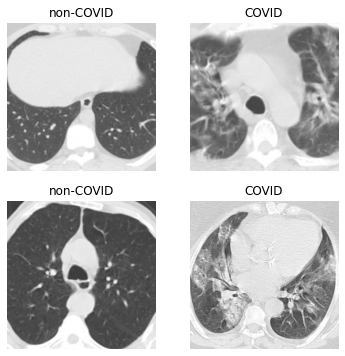

In [9]:
dls = covid.dataloaders(path)
dls.valid.show_batch(max_n=4)

In [10]:
dls.train.vocab

['non-COVID', 'COVID']

In [11]:
res18 = cnn_learner(dls, resnet18, metrics=[F1Score(), Recall()], path=folder_path)

SuggestedLRs(valley=0.0008912509656511247)

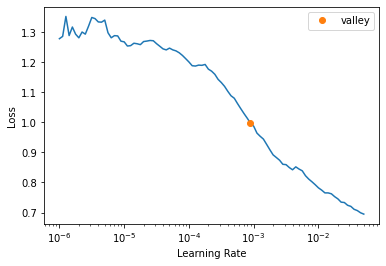

In [12]:
res18.lr_find(start_lr=1e-6, end_lr=0.1)

In [13]:
lr = 1e-3
res18.fine_tune(3, lr)

epoch,train_loss,valid_loss,f1_score,recall_score,time
0,0.819651,0.578840,0.755556,0.699588,00:37


epoch,train_loss,valid_loss,f1_score,recall_score,time
0,0.392099,0.271594,0.883436,0.888889,00:39
1,0.275061,0.199055,0.927660,0.897119,00:38
2,0.215822,0.180032,0.933054,0.917695,00:39


In [ ]:
df_rec18 = pd.DataFrame(res18.recorder.values)

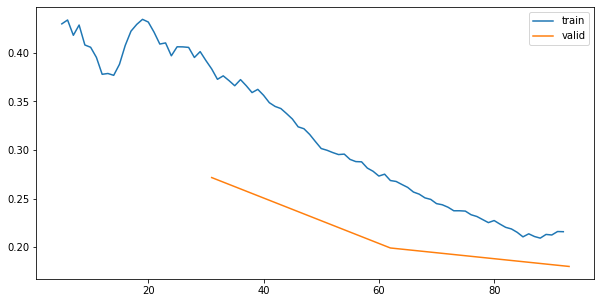

In [14]:
plt.figure(figsize=(10,5))
res18.recorder.plot_loss()

In [15]:
res18.recorder.values[-1][2]

0.9330543933054394

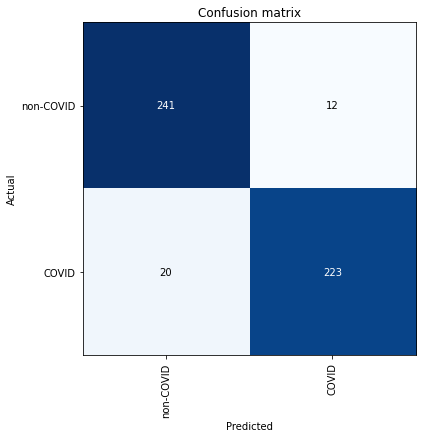

In [16]:
interp = ClassificationInterpretation.from_learner(res18)
interp.plot_confusion_matrix(figsize=(6,6))

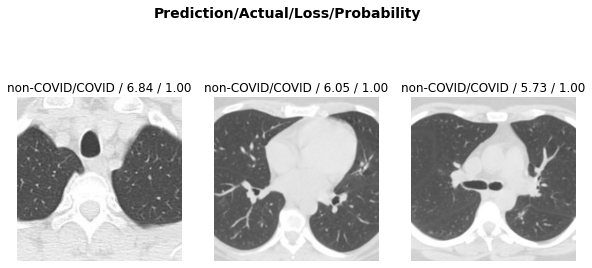

In [17]:
interp.plot_top_losses(3, figsize=(10,5))

In [18]:
res18.predict(f"{dataset_path}/COVID/Covid (1000).png")

('COVID', TensorBase(1), TensorBase([8.2759e-07, 1.0000e+00]))

In [20]:
res34 = cnn_learner(dls, resnet34, metrics=[F1Score(), Recall()], path=folder_path)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [21]:
lr = 1e-3
res34.fine_tune(5, lr)

epoch,train_loss,valid_loss,f1_score,recall_score,time
0,0.924264,0.752542,0.768456,0.942387,00:44


epoch,train_loss,valid_loss,f1_score,recall_score,time
0,0.436085,0.352239,0.867159,0.967078,00:56
1,0.304485,0.151059,0.950207,0.942387,00:56
2,0.186340,0.147257,0.964948,0.962963,00:56
3,0.121190,0.108608,0.960986,0.962963,00:56
4,0.081713,0.103695,0.961145,0.967078,00:56


In [31]:
df_rec34 = pd.DataFrame(res34.recorder.values)

[(#3) [0.10369458794593811,0.9611451942740287,0.9670781893004116]]

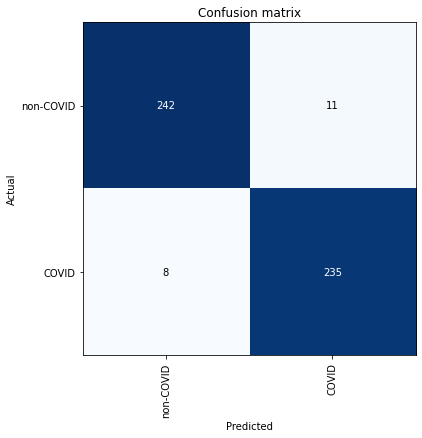

In [22]:
interp = ClassificationInterpretation.from_learner(res34)
interp.plot_confusion_matrix(figsize=(6,6))

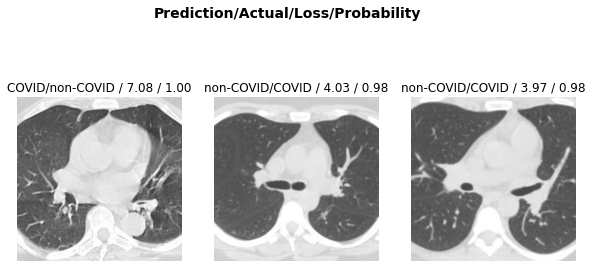

In [23]:
interp.plot_top_losses(3, figsize=(10,5))

## Inference

Load the model from URL

In [24]:
res34.export('res34.pkl')
!ls {folder_path}

export.pkl  models  res34.pkl


In [29]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=151TwzuC8exmzntoh-iQDXPJT71A1CcGU' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=151TwzuC8exmzntoh-iQDXPJT71A1CcGU" -O res34.pkl && rm -rf /tmp/cookies.txt &> 2

--2021-12-12 23:09:57--  https://docs.google.com/uc?export=download&confirm=obMk&id=151TwzuC8exmzntoh-iQDXPJT71A1CcGU
Resolving docs.google.com (docs.google.com)... 74.125.124.113, 74.125.124.102, 74.125.124.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.124.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-70-docs.googleusercontent.com/docs/securesc/00n6h4qetcujgrrl3q2jl4nd45bu3671/c0sucropnhpjdd88bkd3m54iuj5pffe0/1639350525000/05955112456020216338/11658563141622280261Z/151TwzuC8exmzntoh-iQDXPJT71A1CcGU?e=download [following]
--2021-12-12 23:09:57--  https://doc-10-70-docs.googleusercontent.com/docs/securesc/00n6h4qetcujgrrl3q2jl4nd45bu3671/c0sucropnhpjdd88bkd3m54iuj5pffe0/1639350525000/05955112456020216338/11658563141622280261Z/151TwzuC8exmzntoh-iQDXPJT71A1CcGU?e=download
Resolving doc-10-70-docs.googleusercontent.com (doc-10-70-docs.googleusercontent.com)... 209.85.234.132, 2607:f8b0:4001:c17::84
Connecting

In [30]:
!ls -la

total 170952
drwxr-xr-x 1 root root     4096 Dec 12 23:09 .
drwxr-xr-x 1 root root     4096 Dec 12 21:05 ..
-rw-r--r-- 1 root root     6090 Dec 12 22:58 2
drwxr-xr-x 4 root root     4096 Dec  3 14:33 .config
-rw-r--r-- 1 root root 87510221 Dec 12 23:09 export.pkl
drwx------ 6 root root     4096 Dec 12 21:07 gdrive
drwxr-xr-x 2 root root     4096 Dec 12 21:27 models
-rw-r--r-- 1 root root 87510221 Dec 12 23:09 res34.pkl
drwxr-xr-x 1 root root     4096 Dec  3 14:33 sample_data


In [33]:
learn_l = load_learner(f'{folder_path}res34.pkl')
c, _, probas = learn_l.predict(f"{dataset_path}/COVID/Covid (1000).png")

In [34]:
probas *= 100

In [35]:
print(f'There\'s a {round(probas[0].item(), 3)}% probability of non-covid and a {round(probas[1].item(), 3)}% probability of covid')

There's a 0.0% probability of non-covid and a 100.0% probability of covid


In [78]:
class Ensemble:
  def __init__(self, models : dict, vocab : list = [0, 1]):
    self.models = models
    self.vocab = vocab
    print(f'vocab: {self.vocab}')
    for name, value in models.items():
      print(f'loaded: {name}')
  
  def calc_probas(self, item):
    probas = []
    for _, model in self.models.items():
      _, _, p = model.predict(item)
      probas.append(p.numpy())
    
    probas = np.stack(probas, axis=0)
    return probas

  def predict(self, item):
    probas = self.calc_probas(item)
    mean, std = probas.mean(axis=0), probas.std(axis=0)
    return self.vocab[mean.argmax()], mean, std


In [103]:
en = Ensemble({'res18': res18, 'res34': res34}, vocab=['non-covid', 'covid'])
pred, mean, std = en.predict(f"{dataset_path}/COVID/Covid (1000).png")
pred, (mean*100).round(3), std.mean()

vocab: ['non-covid', 'covid']
loaded: res18
loaded: res34


('covid', array([  0., 100.], dtype=float32), 1.7161732e-06)

In [104]:
en.calc_probas(f"{dataset_path}/COVID/Covid (1000).png")

array([[8.2759141e-07, 9.9999917e-01],
       [4.2352149e-06, 9.9999571e-01]], dtype=float32)

In [39]:
covid = covid.new(
    item_tfms=Resize(350),
    batch_tfms=[DeterministicFlip, RandomErasing(p=.5, sh=.1)])
dls = covid.dataloaders(path)

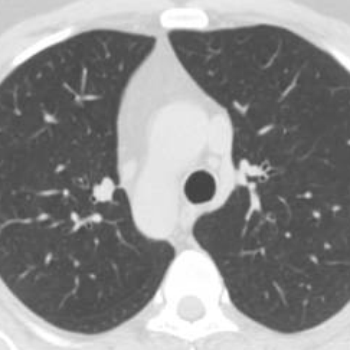

In [40]:
train_features, train_labels = next(iter(dls.train))
trans = T.ToPILImage()
trans(train_features[0])